Import all necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

Read CSV

In [ ]:
path = '/content/charts-excess-mortality.csv'
df = pd.read_csv(path, delimiter=';')
df.head()

,group,year,week,value
0,Total,2021,0,0
1,Total,2021,1,16390
2,Total,2021,2,36175
3,Total,2021,3,58231
4,Total,2021,4,76657


Plot the graph

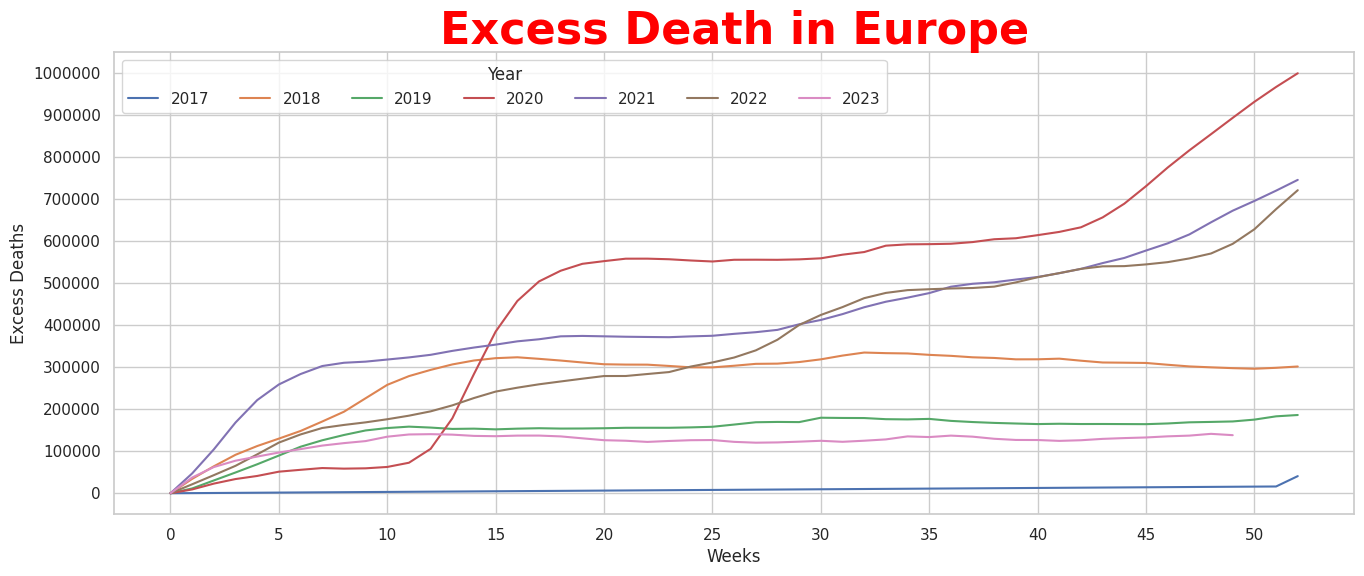

In [ ]:
grouped_df = df.groupby(['year', 'week'])['value'].sum().reset_index()
grouped_df = grouped_df.sort_values(by=['year', 'week'])

plt.figure(figsize=(16, 6))

for year, data in grouped_df.groupby('year'):
    plt.plot(data['week'], data['value'], label=str(year))

plt.xlabel('Weeks')
plt.ylabel('Excess Deaths')
plt.title('Excess Death in Europe', fontsize=32, color='red', fontweight='bold')

plt.gca().xaxis.set_major_locator(MultipleLocator(5))
y_ticks = np.arange(0, int(grouped_df['value'].max()) + 100000, 100000)
plt.yticks(y_ticks, [tick for tick in y_ticks])


plt.legend(title='Year', ncol=len(grouped_df['year'].unique()))
plt.show()
